# 6. 결정 트리

* 분류와 회귀 작업, 다중출력 작업도 가능한 알고리즘.
* 복잡한 데이터셋도 학습 가능.
* 랜덤 포레스트의 기본 구성 요소.

## 6.1 결정 트리 학습과 시각화

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.data[:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [48]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

붓꽃 데이터의 petal length/width를 이용하여 DecisionTreeClassfier를 훈련시킴

export_graphviz() 함수를 이용해 그래프 정의를 시각화

In [7]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

$ dot -Tpng iris_tree.dot -o iris_tree.png

<img src="https://drive.google.com/uc?id=1nlAwcWceF12s2RUkeAtCPkyfsd-6v05o" width="500">

위의 결정 트리는 다음과 같이 작동함
1. 루트노드에서 시작
2. 꽃입길이가 2.45sm보다 짧은지 검사 (짧으면 왼쪽으로 길면 오른쪽으로)
3. 리프노드가 될 때까지 반복.

##### 결정 트리는 데이터 처리가 거의 필요하지 않는 장점이 있음. 특히 특성의 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않음.

노드 설명
* samples : 해당 노드에 적합한 훈련 샘플의 수
* value : 노드에서 각 클래스의 훈련 샘플 수
* gini : 불순도(impurity)를 측정
    * 노드에 속한 샘플이 모두 같은 클래스에 속해 있으면 0이 나옴.
    * $G_i=1-\sum_{k=1}^{n}{P_{i,k}}^2$ ( $P_{i,k}$는 $i$번째 노드에 있는 훈련 샘플 중 클래스 $k$에 속한 샘플의 비율, $n$은 클래스의 수 )

##### 사이킷런은 이진 트리만 만드는 CART 알고리즘 사용. 즉, 모든 노드는 자식노드를 2개까지 가짐. ID3 알고리즘은 둘이상의 자식노드를 가짐

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


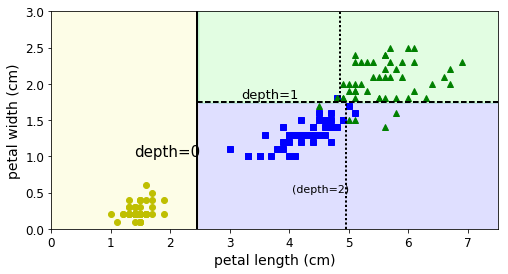

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("petal length (cm)", fontsize=14)
        plt.ylabel("petal width (cm)", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "depth=0", fontsize=15)
plt.text(3.2, 1.80, "depth=1", fontsize=13)
plt.text(4.05, 0.5, "(depth=2)", fontsize=11)

plt.show()

굵은 선이 루트 노드의 결정 경계 patal length = 2.45를 나타내며 왼쪽은 순수 노드가 됨<br>
이때 우측은 순수노드가 아니기 때문에 이번엔 patal width = 1.75로 나눠짐. max_depth를 2로 설정했기 때문에 더이상 분할 안됨.<br>
만약 max_depth를 3으로 했을 경우 점선의 결정 경계가 생길 것

In [24]:
tree_clf_d3 = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_d3.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [26]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf_d3,
        out_file=image_path("iris_tree_d3.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

<img src="https://drive.google.com/uc?id=1XOK9AHv36EPYhXjoArgvOUUMIQLiXRnm" width="600">

#### 모델 해석 : 화이트박스와 블랙박스
- 화이트 박스 모델 : 매우 직관적이며 결정 방식을 이해하기 쉬운 모델 (결정 트리)
- 블랙 박스 모델 : 성능이 뛰어나고 예측을 만드는 연산 과정을 쉽게 확인 가능, 하지만 왜 그런 예측이 나온지 설명하기 어려움 (신경망, 랜덤 포레스트)
- 신경망이 사진 속 사람을 판단했을 때, 눈을 인식한 것인지, 입을 인식한 것인지, 확인하기 어려움. 반면 결정 트리는 수동으로 직접 따라 해볼 수 있음.

## 6.3 클래스 확률 추정
결정 트리는 주어지는 샘플이 특정 클래스 $k$에 속할 확률을 추정 할 수 있음.

In [29]:
tree_clf.predict_proba([[5,1.5]]) #길이가 5이고 너비가 1.5인 샘플의 클래스 예측 확률

array([[ 0.        ,  0.90740741,  0.09259259]])

In [36]:
tree_clf.predict([[5, 1.5]]) #확률이 가장 높았던 Iris-Versicolor 출력

array([1])

## 6.4 CART 훈련 알고리즘
사이킷런은 결정 트리를 훈련시키기 위해, CART(Classfication And Regeression Tree) 알고리즘 사용
- 훈련 세트를 하나의 특성 $k$의 임계값 $t_k$를 사용해 두 개의 서브셋으로 나눔

어떻게 $k$와 $t_k$를 고를까? 가장 순사한 서브셋으로 나눌 수 있는 $(k, t_k)$짝을 찾음.
$$
J(k,t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}
$$
- $G_{left/right}$는 왼쪽/오른쪽 서브셋의 불순도, $m_{left/right}$는 왼쪽/오른쪽 서브셋의 샘플수를 말함.
- 불순도에 샘플수를 곱해 샘플이 개수에 따른 가중치가 적용됨.
- 훈련 세트를 성공적으로 나누면 위를 반복하여 다음 서브셋으로 나눔을 반복.
- max_depth 매개변수로 정의된 최대 깊이가 되면 중지하거나, 불순도를 줄이는 분할을 찾을 수 없을 때 멈춤.

CART 알고리즘 특징
- 탐욕적 알고리즘 (Greedy algorithm)
    - 맨 위 루트노드에서 최적의 분할을 찾으며 각 단계에서 앞 과정을 반복.
    - 현재 단계의 분할이 몇 단계를 거쳐 가장 낮은 불순도로 이어질 수 있을지 없을지 고려 안함.
- 최적의 솔루션을 보장하지는 않음.
- NP-Complete 문제이며 $O(exp(m))$ 시간이 필요함.

## 6.5 계산 복잡도
m은 훈련 샘플 수, n은 훈련 샘플의 특성 수

예측
- 루트 노드부터 리프 노드까지 탐색.
- 일반적으로 균형을 이루고 있으므로 약 $O(\log_{2}{(m)})$개의 노드를 거침.
- 각 노드는 하나의 특성 값만 확인하기 때문에 복잡도도  $O(\log_{2}{(m)})$임
- 큰 훈련세트를 다룰때도 예측 속도가 빠름

훈련
- 각 노드에서 모든 훈련 샘플의 모든 특성을 비교함. (max_features가 지정되면 그보다 적은 특성 비교)
- 훈련 세트가 작을 경우 사이킷런은 (presort=True 지정시) 미리 데이터를 정렬하여 훈련속도를 높일 수 있으나, 훈련 세트가 클 경우 많이 느려짐. 
- 훈련 복잡도는 $O(n \times m \log{(m)})$이 됨. ($O(\log(m))$은 퀵정렬의 복잡도이며 특성만큼 반복)

## 6.6 지니 불순도 또는 엔트로피?
criterion 매개변수를 "entropy"로 지정하여 엔트로피 불순도를 사용 할 수 있음.<br>
#### 엔트로피
- (열역학) 분자의 무질서함을 측정하는 것으로 안정되고 질서 정연하면 0에 가까움.
- (정보 이론) 메시지의 평균 정보 양을 측정하는 것으로 모든 메시지가 동일할 때 0이 됨.
- (ML) 어떤 세트가 한 클래스의 샘플만 담고 있을때 0이 됨.
- $H_i = -\sum_{k=1}^{n}P_{i,k}log_2{(P_{i,k})}$
- 지니 불순도와 큰차이가 없으며, 계산이 좀 더 느림.
- 좀 더 균형 잡힌 트리를 만들어 줌. (지니 불순도의 경우 빈도 높은 클래스를 한쪽 가지로 고립시키는 경향이 있음) <a href="https://tensorflow.blog/2018/03/25/%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC%EC%99%80-%EB%B6%88%EC%88%9C%EB%8F%84%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B6%81%EA%B8%88%EC%A6%9D/" target="_blank">참고</a>

## 6.7 규제 매개변수
결정 트리는 훈련 데이터에 대한 제약사항이 거의 없음.<br>
제한을 두지 않으면 과대적합되기 쉬움.<br>
- 비파라미터 모델 : 훈련되기 전에 파라미터 수가 결정되지 않음.
- 파라미터 모델 : 선형모델 같이 미리 정의된 모델 파라미터 수를 가지므로 자유도가 제한되고 과대적합될 위험이 줄어 듬.

DecisionTreeClassifier에는 다음과 같은 매개변수를 사용으로 규제가 가능함.
- max_depth : 결정 트리의 최대 깊이
- min_samples_split : 분할되기 위해 노드가 가져야 하는 최소 샘플 수
- min_samples_leaf : 리프 노드가 가지고 있어야 할 최소 샘플 수
- min_weight_fraction_leaf : min_samples_leaf와 같지만 가중치가 부여된 전체 샘플 수에서의 비율
- max_leaf_nodes : 리프 노드의 최대 수
- max_features : 각 노드에서 분할에 사용할 최대 특성 수

5장에서 사용한 moons 데이터셋에 규제 없는 결정 트리와 min_sample_leaf를 4로 규제한 트리를 비교해보자.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


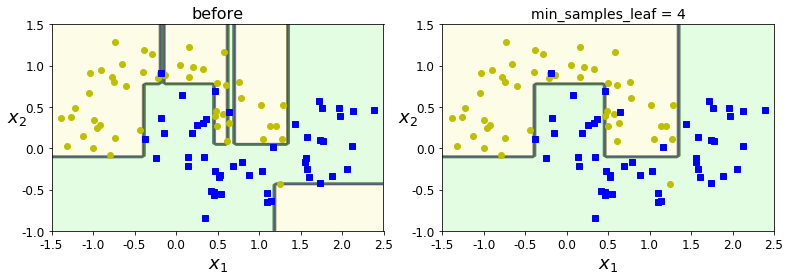

In [37]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("before", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

#### 가지치기(pruning)
- 제한없이 결정 트리를 훈련시키고 불필요한 노드를 제거하는 알고리즘
- 사이킷런은 트리 생성을 미리 제한하는 사전 가지치기만 지원.
- 순도를 높이는 것이 통계적으로 큰 효과가 없으면 리프노드 바로 위 노드는 불필요할 수 있음.
- 귀무가설 : 차이가 없거나 의미 있는 차이가 없음을 증명하는 것
    - $\chi^2$검정(카이제곱검정)을 통해 우연히 향상된 것인지 추정함
    - 이 확률을 $p-$라 부르며 카이제곱 값이 커지만 $p-$값은 줄어듬.
    - $p-$값이 임계값(통상적으로 5%)보다 높으면 순도 향상이 우연에 의한 것으로 볼 수 있음.
- 이러한 노드가 없어질때 까지 반복

## 6.8 회귀
사이킷런의 DecisionTreeRegressor를 사용해 회귀 문제에도 사용할 수 있음.

노이즈가 섞인 2차 함수 형태의 데이터셋에 max_depth=2 설정으로 회귀 트리를 만들어보자.

In [38]:
# 2차식으로 만든 데이터셋 + 잡음
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [39]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [41]:
export_graphviz(
        tree_reg,
        out_file=image_path("regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

<img src="https://drive.google.com/uc?id=1SamHolaOZoliPSmryemjx-xWb1efNU1V" width="400">

분류 트리와 비슷해 보임.다른 점은 클래스를 예측하는게 아닌 어떤 값을 예측함.<br>
예를 들어 x1이 0.6인 샘플의 클래스 예측시 루트노드 부터 트리를 순회하면 value는 0.1106인 리프노드에 도달함 <br>
리프노드는 훈련 샘플의 평균 타깃값으로 예측값이 됨.<br>
즉, 이 리프노드의 110개 훈련 샘플의 평균 타깃값이 예측값이 됨.<br>
이 예측값을 사용해 110개의 샘플에 대한 평균제곱오차(MSE)를 계산하면 0.0151이 됨.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


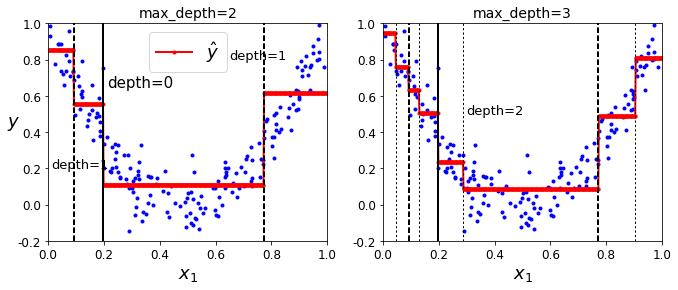

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "depth=0", fontsize=15)
plt.text(0.01, 0.2, "depth=1", fontsize=13)
plt.text(0.65, 0.8, "depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)


plt.show()

각 영역의 예측값은 항상 그 영역에 있는 타깃값의 평균.<br>
예측값과 가능한 많은 샘플이 가까이 있도록 영역을 분할함.

CART 알고리즘은 불순도를 최소화 했던 분류와 달리 평균제곱오차(MSE)를 최소화 하도록 함.
$$
J(k,t_k) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}
$$
* $MSE_{node} = \sum_{i \in node}(\hat{y}_{node} - y^{(i))})^2$
* $\hat{y}_{node} = \frac{1}{m_{node}}\sum_{i \in node}y^{(i)}$

회귀에서도 과대 적합되기 쉬움.
규제가 없으면 왼쪽 그림, min_samples_leaf=10의 규제를 주면 오른쪽 그래프 처럼 나옴.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


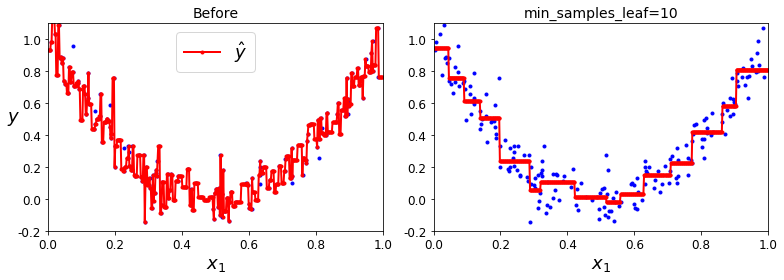

In [44]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("Before", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

## 6.9 불안정성
* 결정 트리는 계단 모양의 결정 경계(축에 수직)를 만들기 때문에 훈련 세트의 회전에 민감(사선 모양).

<img src="https://drive.google.com/uc?id=17v9-V7GPIIAS-QYSZZzM7S39UyM05UY7" width="600">

왼쪽의 경우 쉽게 구분하지만, 데이터 셋을 45도 회전한 오른쪽의 결정 트리는 불필요하게 구불구불 해짐.<br>
좌,우 모두 훈련 세트에 완벽하게 학습하지만, 일반화는 왼쪽이 더 잘되어 있음<br>
PCA기법 (8장에서 나옴)을 통해 훈련 데이터를 더 좋은 방향으로 회전 시켜 문제 해결 가능.

훈련 데이터에 있는 작은 변화에도 민감함.

훈련세트에서 가장 넒은 Iris-Versicolor(꽃잎 길이가 4.8, 너비가 1.8인 것들)를 제거하고 결정 트리를 훈련시키면 매우 다른 모습이 됨.

In [49]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # 가장 너비가 큰 Iris-Versicolor

array([[ 4.8,  1.8]])

In [50]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=40, splitter='best')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


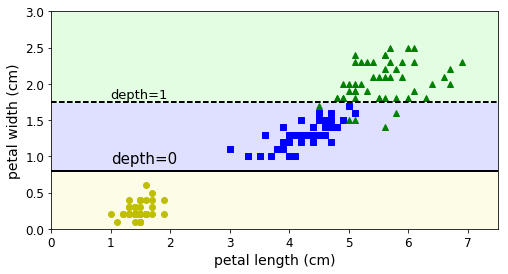

In [51]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "depth=0", fontsize=15)
plt.text(1.0, 1.80, "depth=1", fontsize=13)

plt.show()

랜덤 포레스트는 많은 트리에서 만든 예측을 평균하여 이런 불안정성을 극복 할 수 있음.

## 연습문제